In [1]:
using Pkg
using Optim
using PyPlot
using LinearAlgebra
using FFTW
using Random

┌ Info: Recompiling stale cache file /home/erichschulman/.julia/compiled/v1.0/Optim/R5uoh.ji for Optim [429524aa-4258-5aef-a3af-852621145aeb]
└ @ Base loading.jl:1190
┌ Info: Recompiling stale cache file /home/erichschulman/.julia/compiled/v1.0/PyPlot/oatAj.ji for PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1190


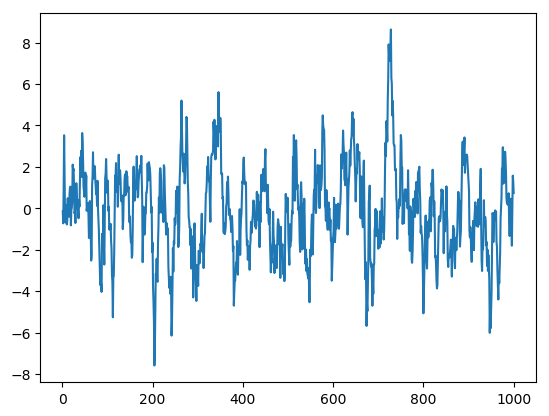

-0.11594844233338787
-0.010932574974395762


In [27]:
f(x,e) = .9*x + e
T = 1000
xs = []
es = []
x_t = 0

for t=1:T
    e_t = randn(1)[1]
    x_t = f(x_t,e_t)
    append!(xs,x_t)
    append!(es,e_t)
end

figure(1)
plot(collect(1:T),xs)
println(sum(xs)/T)
println(sum(es)/T)

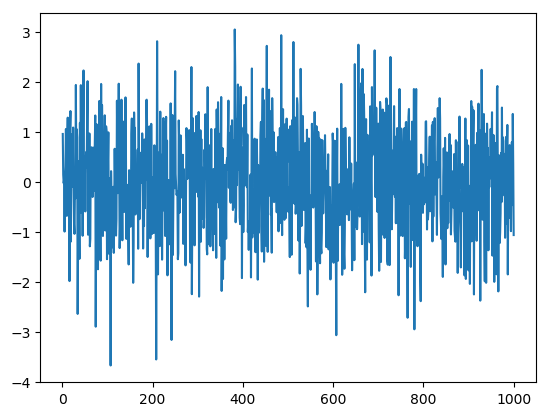

-0.018731275554736745
-0.021449484281577783


In [40]:
f(x0,x1,e) = 0.05*x0 - 0.2*x1 + e
T = 1000
xs = []
es = []
x_t1 = 0
x_t2 = 0

for t=1:T
    e_t = randn(1)[1]
    x_t = f(x_t1, x_t2, e_t)
    append!(xs,x_t)
    append!(es,e_t)
    x_t2 = x_t1
    x_t1 = x_t
end

figure(1)
plot(collect(1:T),xs)
println(sum(xs)/T)
println(sum(es)/T)

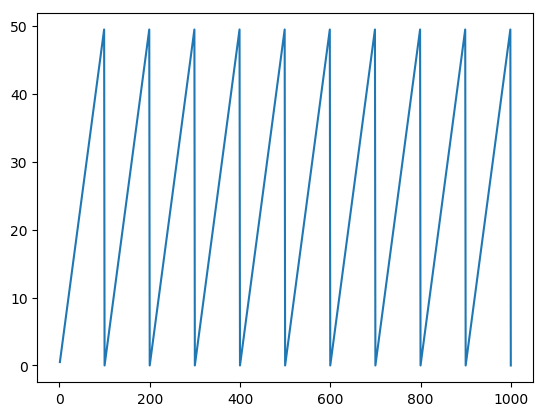

24.75


In [119]:
T = 1000
x0 = 0.0
xs = zeros(T)
f(x,e) = mod(x+e,50.0)
x = 0
es = zeros(T)

for t=1:T
    e = .5
    x = f(x,e)
    xs[t] = x
    es[t] = e
end

figure(1)
plot(collect(1:T),xs)
println(sum(xs)/T)

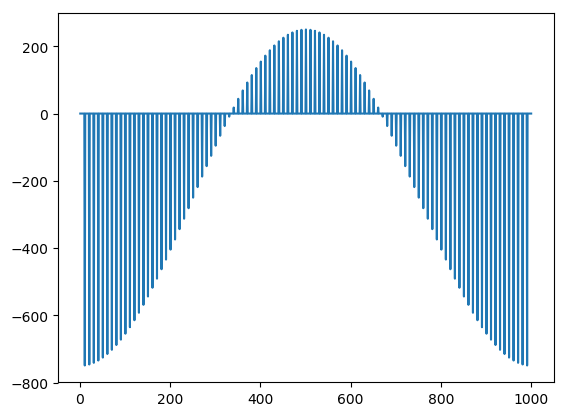

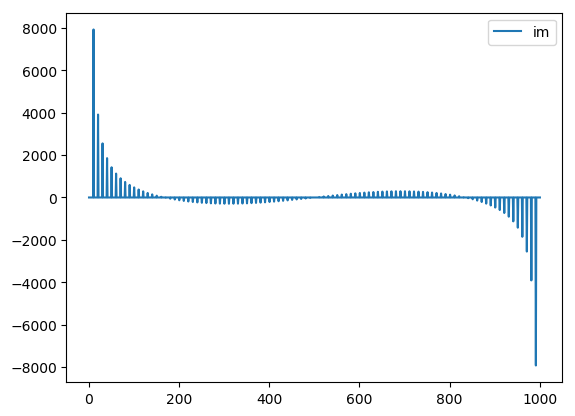

In [121]:
fs = fft(xs.- sum(xs)/T)
fs = reinterpret(Float64, fs)
fre = @view fs[1:2:end-1]
fim = @view fs[2:2:end]
figure(1)
plot(collect(1:T),fre,label="re")

figure(2)
plot(collect(1:T),fim,label="im")
legend()
show()

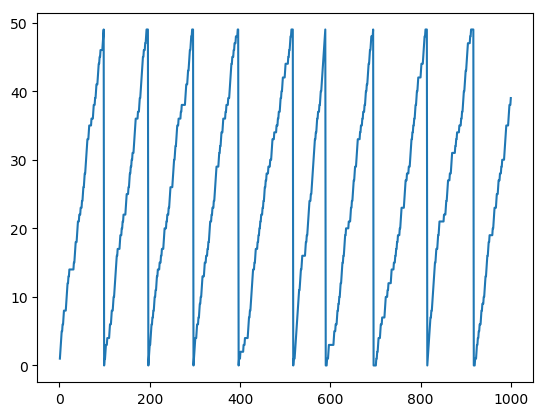

24.247


In [115]:
T = 1000
x0 = 1.0
xs = zeros(T)
f(x,e) = mod(x+e,50.0)
x = 0
es = zeros(T)

for t=1:T
    e = randsubseq([1],0.5)
    e = Integer(e != [])
    x = f(x,e)
    xs[t] = x
    es[t] = e
end

figure(1)
plot(collect(1:T),xs)
println(sum(xs)/T)

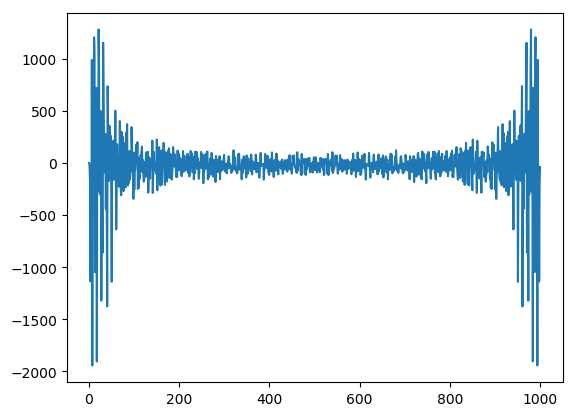

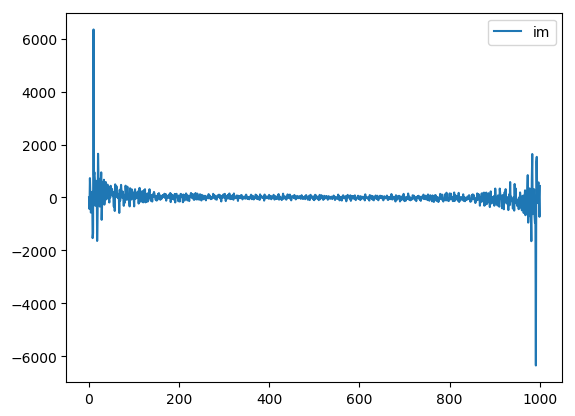

In [116]:
fs = fft(xs.- sum(xs)/T)
fs = reinterpret(Float64, fs)
fre = @view fs[1:2:end-1]
fim = @view fs[2:2:end]
figure(1)
plot(collect(1:T),fre,label="re")
figure(2)
plot(collect(1:T),fim,label="im")
legend()
show()